C:\Users\daiya\AppData\Local\Temp\ipykernel_21776\2973315600.py:26: RuntimeWarning: invalid value encountered in divide
  S = np.where(L < 0.5, (vmax - vmin) / (vmax + vmin), (vmax - vmin) / (2 - vmax - vmin))
C:\Users\daiya\AppData\Local\Temp\ipykernel_21776\2973315600.py:28: RuntimeWarning: invalid value encountered in cast
  S = (S * 255).astype(np.uint8)


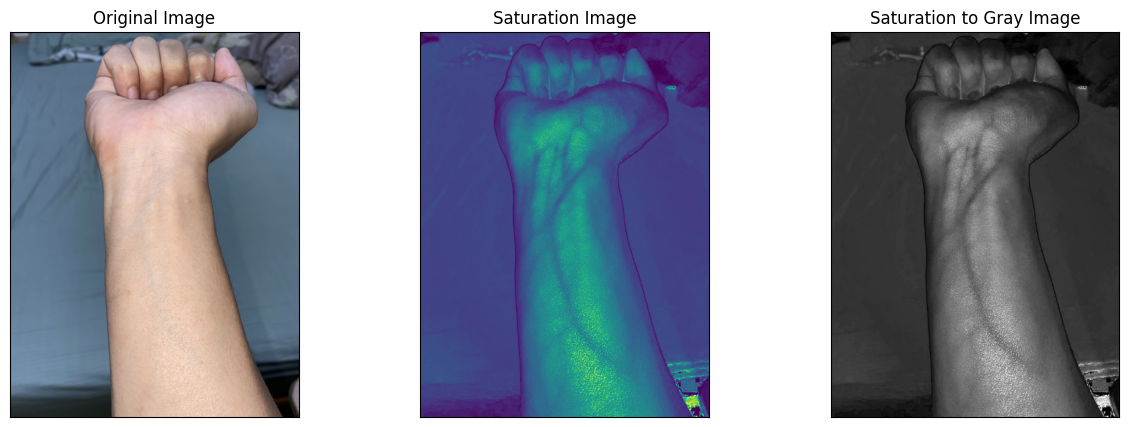

In [3]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

def show(img, cmap=False):
    if cmap==False:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])

def saturation_channel(image_path):
    image = cv2.imread(image_path)
    
    R = image[:, :, 0] / 255.0
    G = image[:, :, 1] / 255.0
    B = image[:, :, 2] / 255.0
    
    vmax = np.max(image / 255.0, axis=2)
    vmin = np.min(image / 255.0, axis=2)

    L = (vmax + vmin) / 2

    S = np.where(L < 0.5, (vmax - vmin) / (vmax + vmin), (vmax - vmin) / (2 - vmax - vmin))

    S = (S * 255).astype(np.uint8)
    
    return S

image_path = "test.jpg"
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
saturation_image = saturation_channel(image_path)

# cv2.imwrite("saturation_image.png", saturation_image)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title("Original Image")
show(original_image)

plt.subplot(132)
plt.title("Saturation Image")
show(saturation_image)

plt.subplot(133)
plt.title("Saturation to Gray Image")
show(saturation_image, cmap=True)